In [1]:
from dbscan import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import pairwise_distances
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
moons = make_moons(n_samples=1000, noise=0.1)

In [3]:
# moons = (np.array([[1,1],[1,0.8],[0,0],[0,0.2]]),np.array([1,1,0,0]))

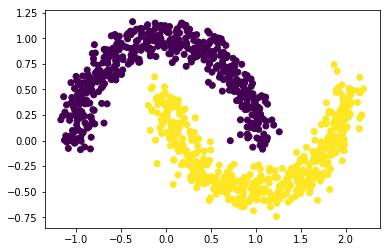

In [4]:
plt.scatter(moons[0][:,0],moons[0][:,1],c=moons[1])

In [5]:
prw_dist = pairwise_distances(moons[0])

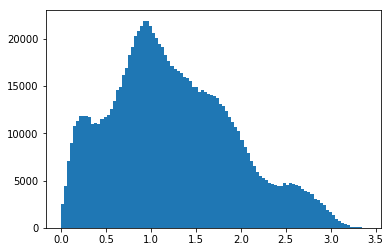

In [6]:
_= plt.hist(prw_dist.flatten(),bins=100)

## 0.32 - is a first pick of distance histogramm 

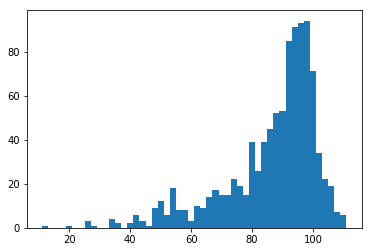

In [7]:
nn = NearestNeighbors(radius = 0.32).fit(moons[0])
nnb_radius = nn.radius_neighbors(moons[0],return_distance=False)
num_of_neighbors = [len(n) for n in nnb_radius]
_=plt.hist(num_of_neighbors, bins=50)

## 89 is choosen pick of neighbors on historagmm for particular distance

100%|██████████| 1000/1000 [00:05<00:00, 192.74it/s]


CPU times: user 4.31 s, sys: 0 ns, total: 4.31 s
Wall time: 5.2 s


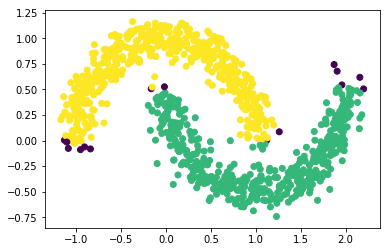

In [8]:
my_dbscan = DBSCAN(eps=0.32, MinPts=89, verbose=True, precomputed=False)

%time my_dbscan.fit(moons[0])

_=plt.scatter(moons[0][:,0],moons[0][:,1],c=my_dbscan.labels)

## using precomputed distances 

INFO:dbscan:Using precomputed distances
100%|██████████| 1000/1000 [00:00<00:00, 11557.20it/s]


CPU times: user 60.6 ms, sys: 0 ns, total: 60.6 ms
Wall time: 94.1 ms


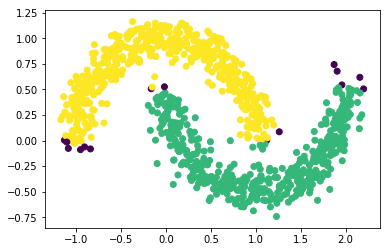

In [11]:
my_dbscan = DBSCAN(eps=0.32, MinPts=89, verbose=True, precomputed=True)

%time my_dbscan.fit(prw_dist)

_=plt.scatter(moons[0][:,0],moons[0][:,1],c=my_dbscan.labels)